<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab08/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neurais

### Objetivos

  - Conhecer e praticar Redes Neurais Convolucionais
  - Conhecer uma intuição sobre Convolução, Pooling 
  - Praticar a classificação de objeto usando Keras/TensorFlow
  

## Redes Neurais Convolucionais

A Redes Neurais Convolucionais ou CNN (Convolutional Neural Network) ou até mesmo ConvNet, são redes neurais de aprendizado profundo, `Deep Learning` muito utilizadas na área de Visão Computacional `classificação`,`detecção de objetos` ou `segmentação semântica`.


Para compreender uma CNN, precisamos compreender o funcionamento de alguns blocos novos fundamentais.

 - Extração de caracteristicas
 - Convolução
 - Pooling



### Diferença de MLP para CNN

- Em uma rede MLP, cada pixel é tratado de forma isolada, sem considerar os demais pixels, dificultando a caracterização de features mais complexas. Não é levado em consideração se o pixel está na borda ou centro da imagem. Em um CNN o processo de convolução leva em consideração esta condição. 

- Outro ponto importante está relacionado a quantidade de parâmetros para treinamento para uma imagem. Exemplo: uma imagem de 400x600 na escala de cinza e 100 neurônios na primeira camada. Parâmetros = (400x600*100 +100) = 24.000.100 de parâmetros para treinamento, apenas na primeira camada.


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/flatten.png?raw=1" width="400p">

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Flatten(input_shape=(800,600)),
    layers.Dense(units=100)
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 480000)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               48000100  
                                                                 
Total params: 48,000,100
Trainable params: 48,000,100
Non-trainable params: 0
_________________________________________________________________


## Convolução

A **convolução**  permite uma **filtragem no domínio espacial**. Esse processo ocorre com a aplicação de **filtros** (pequenas matrizes), posicionadas sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.

Normalmente os **kernels** são matrizes 3x3. E os pesos são ajustados a cada iteração pelo **backpropagation**

Nesta imagem temos a imagem original em azul, o kernel em cinza varrendo a imagem e o resultado da convolução em verde. 

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/same_padding_no_strides.gif?raw=1">


Vamos analizar o que acontece em apenas um pixel da imagem:

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convolution.png?raw=1">



O resultado para cada pixel é esse:

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/conv3d.gif?raw=1">


O resultado em uma imagem é o seguinte: 

  <img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convexp.png?raw=1">

## Implementação em código

Para implementar é simples. 


 ``layers.Conv2D(100, (3, 3))``

 -> 100 é a quantidade de filtros (kernels) que serão criados
 
 -> (3,3) é o tamanho do filtro que será usado.
 
 -> outros argumentos como activation, input_shape tambem podem ser utlilizados.





In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Conv2D(filters = 100, kernel_size = (3, 3), activation='relu', input_shape=(800,600, 3)),
])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 798, 598, 100)     2800      
                                                                 
Total params: 2,800
Trainable params: 2,800
Non-trainable params: 0
_________________________________________________________________


## Desafio 1 

Compare a quantidade de ``Total params``, em uma rede CNN esse valor é menor ou maior comparado com uma rede MLP?

In [18]:
### Sua resposta aqui...




## Pooling

De forma geral a camada de `pooling` realiza uma operação de redução da imagem de entrada tentando manter as caracteristicas mais relevantes. Por consequência, o custo computacional diminui, além disso, é nesta etapa que são extraídas as característica `features` mais importantes da imagem.

O pooling mais comum é utilizando um kernel 2x2, e um passo `stride` de 2, por consequência a imagem de saída terá a metade da imagem de entrada. A operação de pooling irá selecionar dentro da janela do kernel o valor que será aplicado na próxima camada, pode ser o maior valor `Maxpooling()` ou a média `AveragePooling()`

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/pooling.png?raw=1">


O resultado visual é o seguinte: 

<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/poolingexp1.png?raw=1">

## Implementação em código

Para implementar é simples. 


 ``layers.MaxPool2D(pool_size=2, strides=2)``

 -> pool_size é o tamanho do filtro (2,2) que será usado.

 -> strides é o passo 2 para percorrer a imagem 
 
 -> Existem outros argumentos que podem ser utlilizados (da uma olhada na documentação).

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Conv2D(filters = 100, kernel_size = (3, 3), activation='relu', input_shape=(800,600, 3)), # camada de convolução
    layers.MaxPool2D(pool_size=2, strides=2) # camada de pooling

])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 798, 598, 100)     2800      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 399, 299, 100)    0         
 2D)                                                             
                                                                 
Total params: 2,800
Trainable params: 2,800
Non-trainable params: 0
_________________________________________________________________


## Desafio 2

1. Qual o dimensional da imagem antes e depois do pooling ?

2. Com a camada de pooling teve alteração ``total params``?



In [23]:
'''
### suas respostas.....

1.


2.


'''

'\n### suas respostas.....\n\n1.\n\n\n2.\n\n\n'

## Extrator de caracteristicas 

A extração de características é o processo pelo qual a CNN identifica padrões e características relevantes em uma imagem. As características são extraídas usando camadas convolucionais seguidas de camadas de pooling.


Após a extração de características é aplicado uma rede MLP para realizar a etapa de classicação da imagem.


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/convnet.png?raw=1">




### Exemplo prático - Fashion MNIST

Vamos utilizar novamente o dataset do Fashion MNIST para classificação de imagens, mas desta vez vamos utilizar uma CNN para realizar a extração de caracteristicas da imagem seguida de um classificador MLP.


## 👗 Parte 5: Exemplo Prático - Fashion MNIST com CNN

### 🎯 Por que Fashion MNIST?

O **Fashion MNIST** é um dataset ideal para aprender CNNs:

- 📊 **Estrutura**: 70.000 imagens 28×28 em escala de cinza
- 👕 **Classes**: 10 tipos de roupas e acessórios
- 🎓 **Complexidade**: Mais desafiador que dígitos do MNIST tradicional
- 📈 **Benchmark**: Padrão da indústria para testes iniciais

### 🏷️ Classes do Dataset:

| Código | Classe | Emoji | Exemplo |
|--------|--------|-------|---------|
| 0 | T-shirt/top | 👕 | Camisetas |
| 1 | Trouser | 👖 | Calças |
| 2 | Pullover | 🧥 | Suéter |
| 3 | Dress | 👗 | Vestidos |
| 4 | Coat | 🧥 | Casacos |
| 5 | Sandal | 👡 | Sandálias |
| 6 | Shirt | 👔 | Camisas |
| 7 | Sneaker | 👟 | Tênis |
| 8 | Bag | 👜 | Bolsas |
| 9 | Ankle boot | 👢 | Botas |

### 🔄 Nossa Estratégia:

1. **Carregar e explorar** os dados
2. **Pré-processar** as imagens  
3. **Construir CNN** progressivamente
4. **Treinar e avaliar** o modelo
5. **Visualizar resultados** e interpretar erros
6. **Comparar** com MLP tradicional

### 💡 O que Esperamos Aprender:

- Como CNNs **extraem características** hierárquicas
- Diferença de **performance** CNN vs MLP
- **Interpretação** dos filtros aprendidos
- **Análise de erros** e limitações

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [25]:
# Importa o dataset Fashion Mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#normaliza os dados para o pixel ficar com valores entre 0 e 1
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
train_images = train_images.reshape(-1,28,28,1)
print(train_images.shape)
test_images = test_images.reshape(-1,28,28,1)
test_images.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

In [37]:
###### montar a arquitetura da rede neural 

from tensorflow.keras import layers

model = keras.Sequential([
    
#####-------CNN-------#####

    layers.Conv2D(5, (3,3), activation='relu', padding="same", input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),
 

 #######------ MLP-----####
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(10, activation='softmax')  ###### neuroniios especialistasss 
])


model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 5)         50        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 5)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 980)               0         
                                                                 
 dense_9 (Dense)             (None, 120)               117720    
                                                                 
 dense_10 (Dense)            (None, 10)                1210      
                                                                 
Total params: 118,980
Trainable params: 118,980
Non-trainable params: 0
_______________________________________________

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs_hist = model.fit(train_images, train_labels, epochs=3, validation_split=0.2)


Epoch 1/3
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2374 - accuracy: 0.9128 - val_loss: 0.2589 - val_accuracy: 0.9027
Epoch 2/3
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2136 - accuracy: 0.9217 - val_loss: 0.2328 - val_accuracy: 0.9143
Epoch 3/3
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1950 - accuracy: 0.9287 - val_loss: 0.2393 - val_accuracy: 0.9117


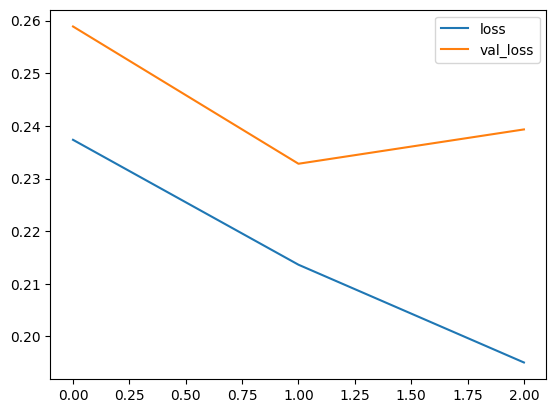

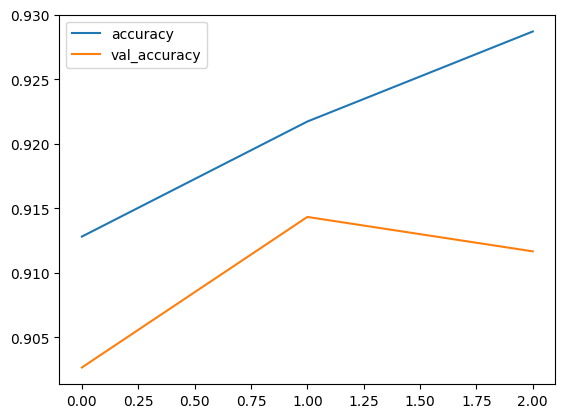

In [ ]:
## exibe os graficos da função loss e acuracia
import pandas as pd
history_df = pd.DataFrame(epochs_hist.history)

history_df[['loss','val_loss']].plot();
history_df[['accuracy','val_accuracy']].plot();


In [32]:
#Validadção
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


1875/1875 - 10s - loss: 0.1883 - accuracy: 0.9318 - 10s/epoch - 5ms/step
313/313 - 4s - loss: 0.2789 - accuracy: 0.8977 - 4s/epoch - 12ms/step


In [33]:
# Previsões com o modelo treinado

predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [34]:
#Vericação dos itens preditos

item = 4000

print("\nClasse predita foi {} com {:2.0f}%. Classe correta é {}, {}.".format(np.argmax(predictions[item]), 
                                                                 100*np.max(predictions[item]),
                                                                 test_labels[item], 
                                                                 class_names[test_labels[item]]))

a=100*np.max(predictions[item])


Classe predita foi 0 com 100%. Classe correta é 0, T-shirt/top.


In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

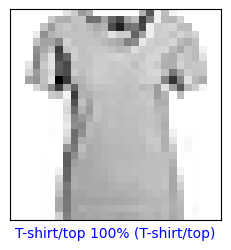

In [36]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(item, predictions, test_labels, test_images)
plt.show()

## Desafio 3

O resultado não ficou muito bom, mas podemos melhorar! 

Implemente a arquitetura da rede LeNet-5. Para treinar o Fashion MNIST.



A leNet-5 foi publicada por leCun em 1998. E é composta basicamente por:


<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab08/lenet.png?raw=1">


- Convolutional Layers (CONV);
- Pooling Layers (POOL);
- Fully-Connected Layers (FC).


Um exemplo de aplicação: https://github.com/gary30404/convolutional-neural-network-from-scratch-python


In [40]:
###### Seu código aqui......






### Desafio Extra

Use uma rede CNN para treinar o cifar-10 usado na rodada3 da batalha das redes.



In [39]:
#### seu código aqui......